# Importing libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

### Load the Telecom churn dataset into a pandas DataFrame.

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Summary of dataset

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Processing data

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No null values.

### Changing datatypes for some columns to appropriate datatypes.

#### Changing `TotalCharges` to `int64`

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
df['TotalCharges'].fillna(value = 0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(int)

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges          int32
Churn                object
dtype: object

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

#### Drop unneccessary columns like `customerID`

In [13]:
df = df.drop(['customerID'], axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306,Yes


### Count plot showing the count of customers who produced churn and did not.

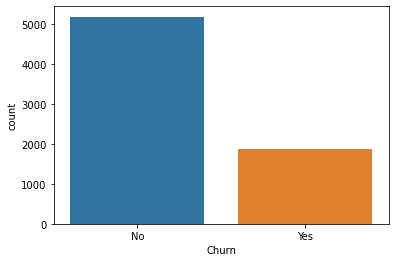

In [14]:
sns.countplot(x = 'Churn', data = df);

#### Count plots representing counts of different categories in each categorical data columns.

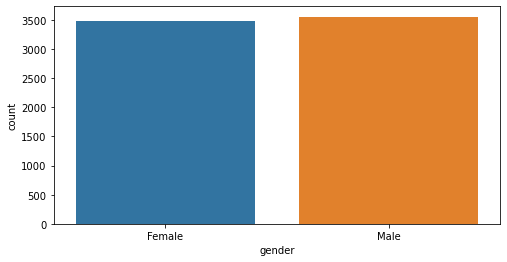

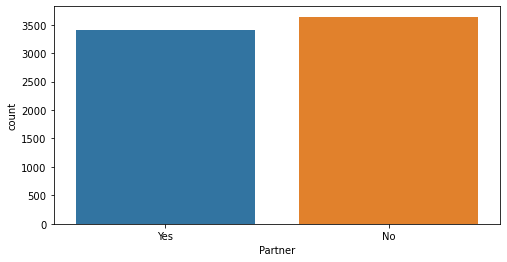

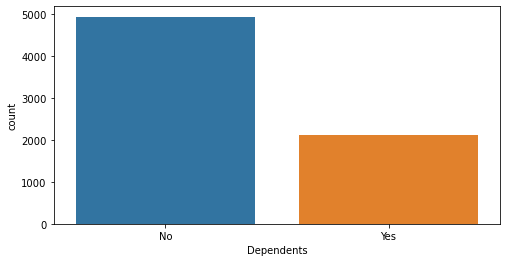

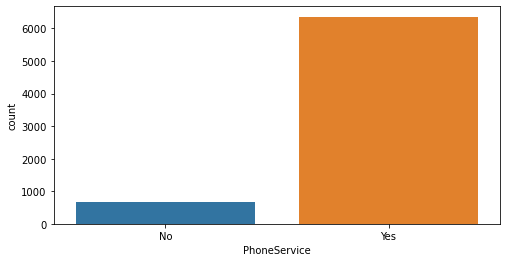

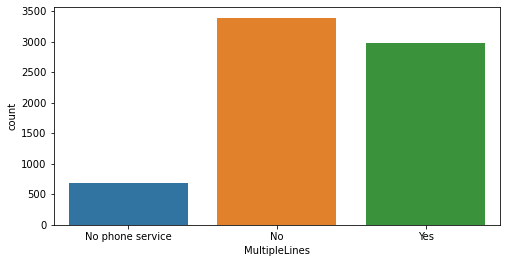

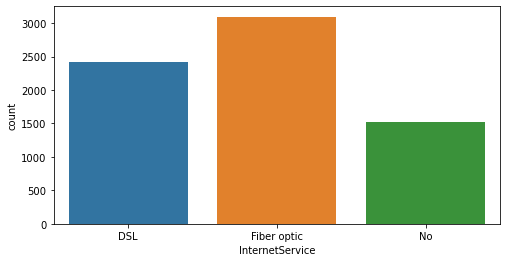

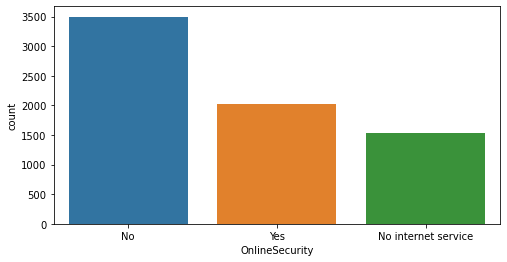

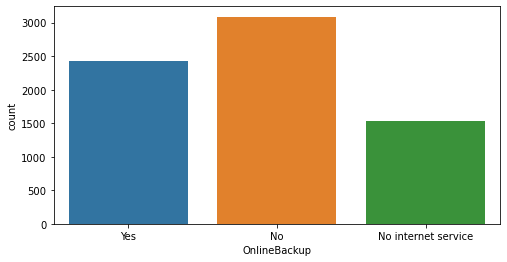

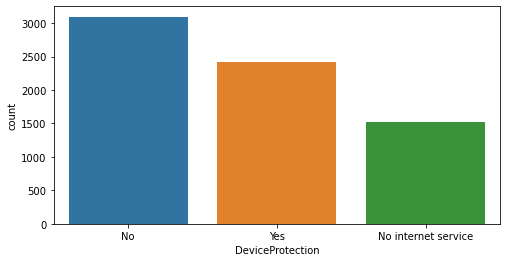

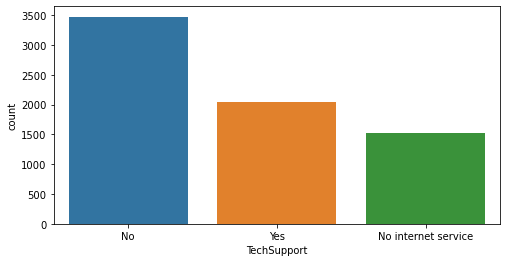

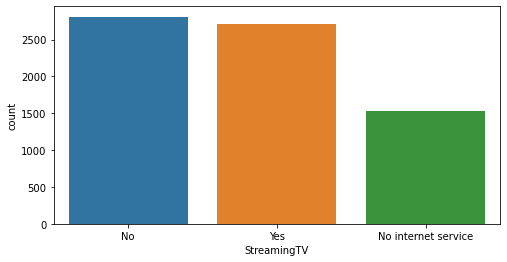

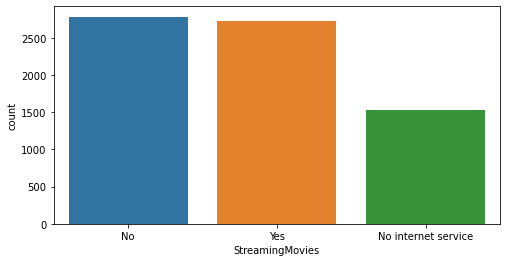

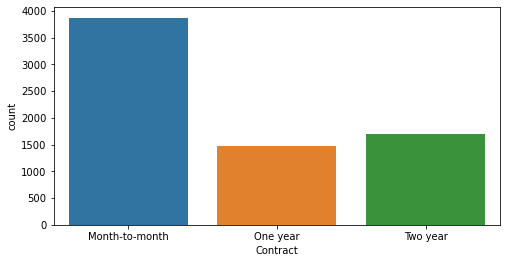

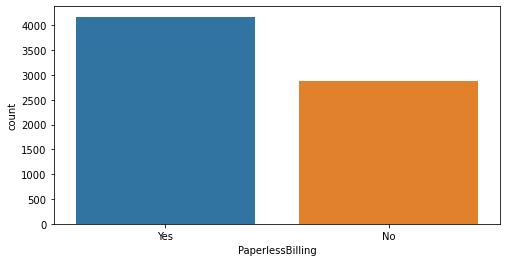

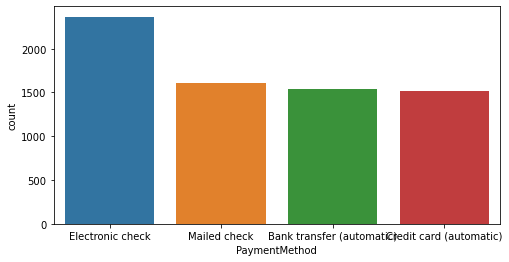

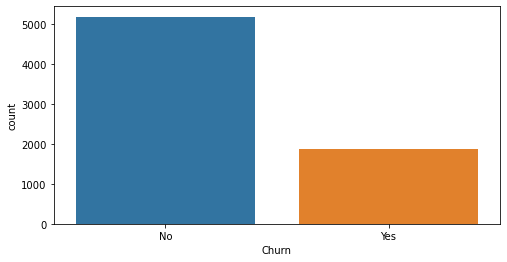

In [15]:
for col in df.select_dtypes(include = 'object'):
    plt.figure(figsize = (8, 4))
    sns.countplot(x = col, data = df)
    plt.show()

**Above graphs are**:

* 1. Count of males and females in the dataset.
    
* 2. Count of individuals with and without partners.
    
* 3. Count of dependent and independent customers.
    
* 4. Count of customers using phone services and customers who are not.
    
* 5. Count of customers with phone services and multiple lines.
    
* 6. Count of different internet services used by the customers.
    
* 7. Count of customers with and without online security.

* 8. Count of customers with and without online backup.
    
* 9. Count of customers with and without device protection.
    
* 10. Count of customers with and without tech support.
    
* 11. Count of customers with and without streaming TV.
    
* 12. Count of customers streaming and not streaming movies.
    
* 13. Count of different contracts customers on.
    
* 14. Count of customers with and without paper less billings.
    
* 15. Count of differnt payment methods used by the customers.
    
* 16. Count of churns produced.

### Boxplots of churns produces based on `MonthlyCharges`, `TotalCharges` and `tenure`.

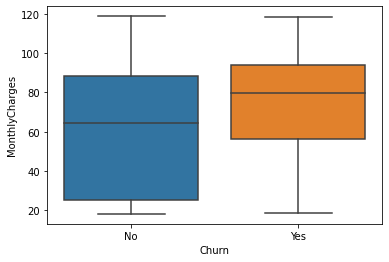

In [16]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df);

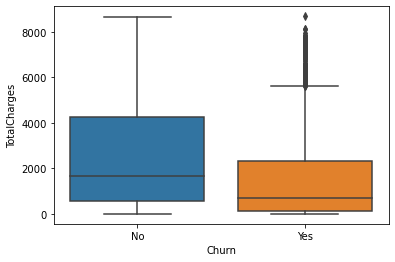

In [17]:
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = df);

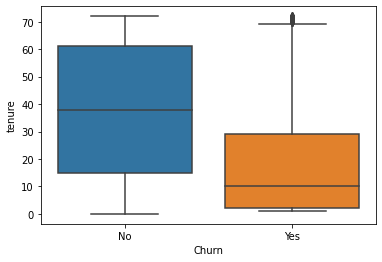

In [18]:
sns.boxplot(x = 'Churn', y = 'tenure', data = df);

### Barplots of churns produced (represented in orange) and churns not produced (represented in blue) based on different columns.

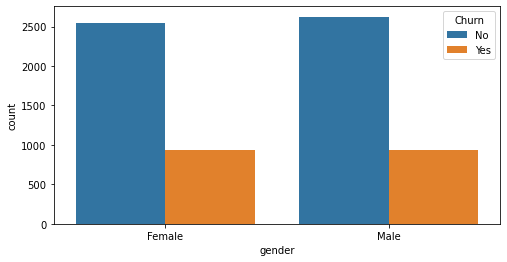

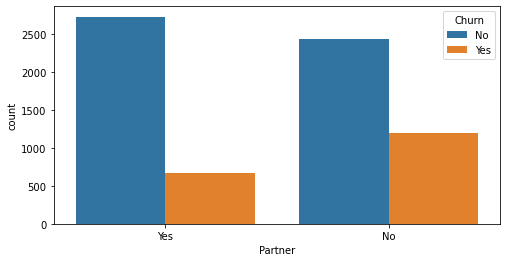

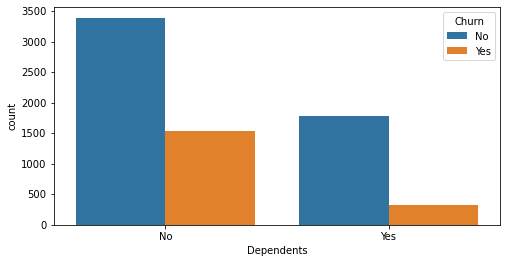

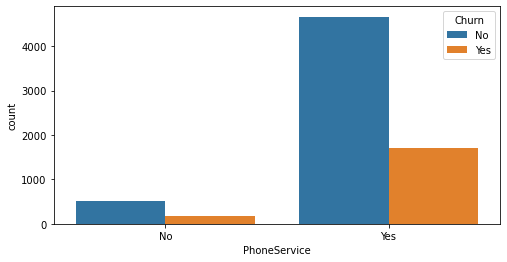

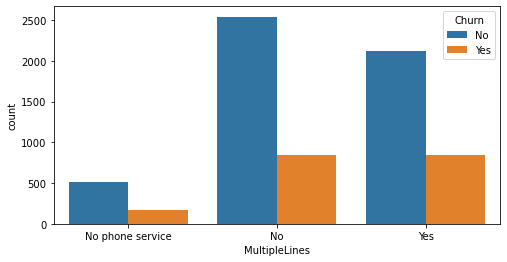

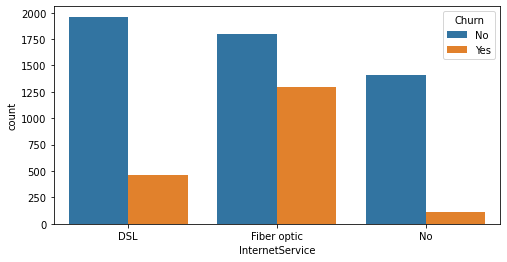

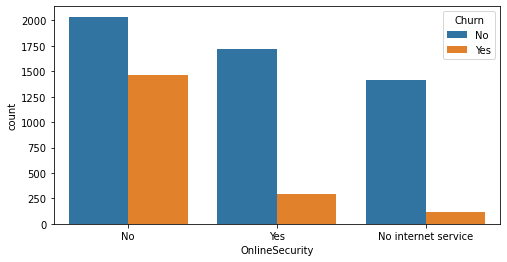

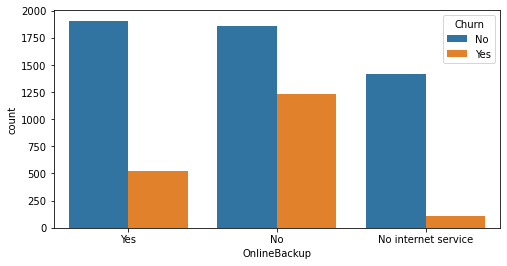

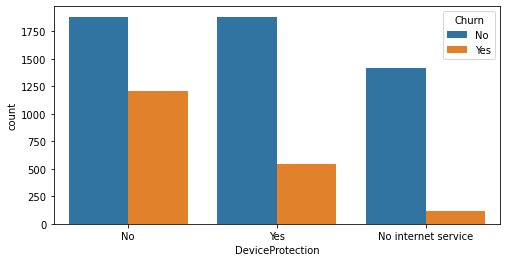

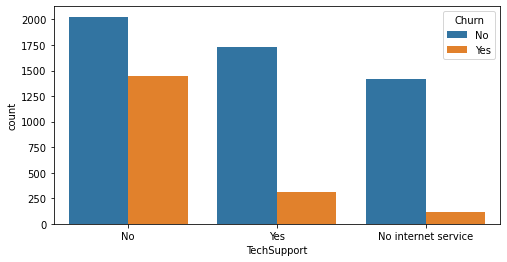

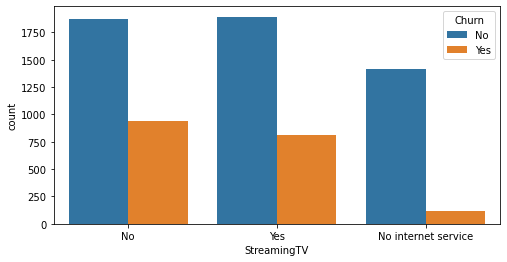

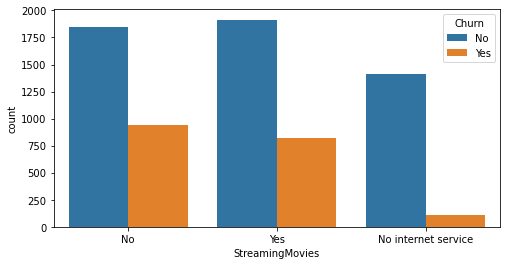

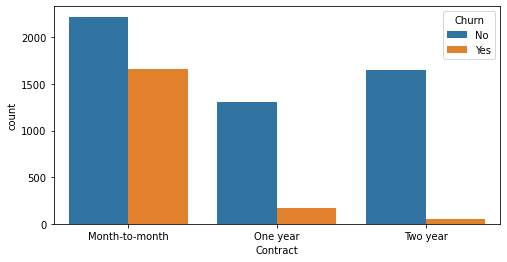

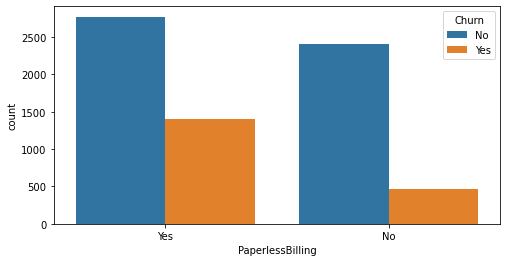

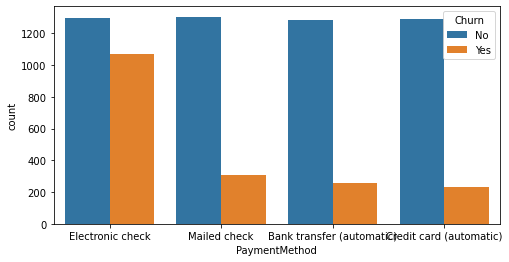

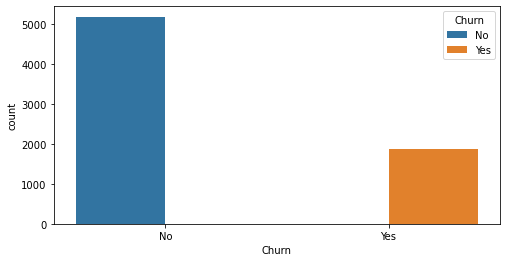

In [19]:
for col in df.select_dtypes(include = 'object'):
    plt.figure(figsize = (8, 4))
    sns.countplot(x = col, hue = 'Churn', data = df)
    plt.show()

**Above graphs are**:

* 1. Churns based on genders.

* 2. Churns based on whether the customers have partners or not.

* 3. Churns based on whether the customers are dependent or not.

* 4. Churns based on whether the customers have phone service or not.

* 5. Churns based on whether the customers have multiple lines or not.

* 6. Churns based on which type of internet service the customers use.

* 7. Churns based on whether the customers have online security or not.

* 8. Churns based on whether the customers have online backup or not.

* 9. Churns based on whether the customers have device protection or not.

* 10. Churns based on whether the customers have tech support or not.

* 11. Churns based on whether the customers have streaming TV or not.

* 12. Churns based on whether the customers stream movies or not.

* 13. Churns based on the type of contracts customes are on.

* 14. Churns based on whether the customers use paper less billings or not.

* 15. Churns based on the payment methods used by the customers. 

* 16. Churns produced.

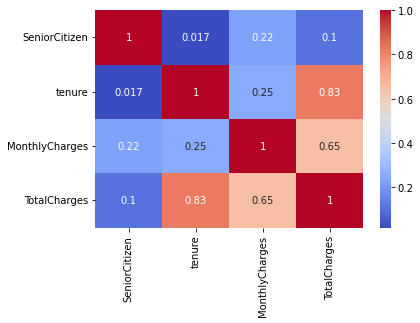

In [20]:
corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm", annot = True);

In [26]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_dummies = pd.get_dummies(df[cat_cols], drop_first = True)
df_final = pd.concat([df, df_dummies], axis = 1)
df_final.drop(cat_cols, axis = 1, inplace = True)

In [27]:
X = df_final.drop(['Churn'], axis = 1)
Y = df_final['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Train a logistic regression model on the training data

In [28]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### Evaluate the model's performance on the testing data

In [31]:
Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[944  92]
 [161 212]]


#### The resulting confusion matrix tells us that there are 944 + 212 = 1156 correct predictions and 92 + 161 = 253 incorrect predictions.

In [34]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



#### The accuracy of this model is 0.82